## Importing Libraries

In [1]:
#!conda install --yes --prefix C:\Users\Asus\anaconda3\envs\tensorflow pandas

import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data Preprocessing

### Training Image preprocessing

In [4]:
# Keras Image data loading
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


### Validation Image Preprocessing

In [5]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [51]:
for x,y in training_set:
    print(x)
    print(y)
    break

tf.Tensor(
[[[[101.   101.    93.  ]
   [102.5  102.5   94.5 ]
   [108.   108.   100.  ]
   ...
   [102.75 107.75 101.75]
   [114.   119.   113.  ]
   [115.25 120.25 114.25]]

  [[101.   101.    93.  ]
   [103.5  103.5   95.5 ]
   [104.25 104.25  96.25]
   ...
   [100.75 105.75  99.75]
   [111.25 116.25 110.25]
   [115.5  120.5  114.5 ]]

  [[103.25 103.25  95.25]
   [ 97.5   97.5   89.5 ]
   [107.25 107.25  99.25]
   ...
   [112.   117.   111.  ]
   [110.25 115.25 109.25]
   [109.   114.   108.  ]]

  ...

  [[ 40.5   33.5   27.5 ]
   [ 34.75  27.75  21.75]
   [ 36.25  29.25  23.25]
   ...
   [124.   130.   130.  ]
   [120.   126.   126.  ]
   [133.25 139.25 139.25]]

  [[ 37.    30.    24.  ]
   [ 31.5   24.5   18.5 ]
   [ 34.25  27.25  21.25]
   ...
   [118.75 124.75 124.75]
   [124.5  130.5  130.5 ]
   [122.75 128.75 128.75]]

  [[ 33.    26.    20.  ]
   [ 32.25  25.25  19.25]
   [ 29.    22.    16.  ]
   ...
   [128.25 134.25 134.25]
   [128.75 134.75 134.75]
   [129.75 135.75 13

## Building Model

In [6]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [7]:
model = Sequential()

In [8]:
## Building convolution layer

In [9]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [10]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [11]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [12]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [13]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [14]:
model.add(Dropout(0.25)) #To avoid overfitting

In [15]:
model.add(Flatten())

In [16]:
model.add(Dense(units=1500,activation='relu'))

In [17]:
model.add(Dropout(0.4))

In [18]:
## output layer
model.add(Dense(units=38,activation='softmax'))

## Compiling Model

In [19]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                   

## Training Model

In [25]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 [==============================] - 803s 365ms/step - loss: 1.2851 - accuracy: 0.6197 - val_loss: 0.4913 - val_accuracy: 0.8425
Epoch 2/10
2197/2197 [==============================] - 873s 398ms/step - loss: 0.4224 - accuracy: 0.8655 - val_loss: 0.2887 - val_accuracy: 0.9063
Epoch 3/10
2197/2197 [==============================] - 884s 402ms/step - loss: 0.2519 - accuracy: 0.9194 - val_loss: 0.2552 - val_accuracy: 0.9175
Epoch 4/10
2197/2197 [==============================] - 777s 353ms/step - loss: 0.1807 - accuracy: 0.9408 - val_loss: 0.1447 - val_accuracy: 0.9540
Epoch 5/10
2197/2197 [==============================] - 783s 356ms/step - loss: 0.1306 - accuracy: 0.9565 - val_loss: 0.1307 - val_accuracy: 0.9578
Epoch 6/10
2197/2197 [==============================] - 746s 340ms/step - loss: 0.1029 - accuracy: 0.9652 - val_loss: 0.1339 - val_accuracy: 0.9563
Epoch 7/10
2197/2197 [==============================] - 745s 339ms/step - loss: 0.0873 - accuracy: 0.9712 - val_

## Model Evaluation

In [26]:
#Evaluation of training set
train_loss, train_acc = model.evaluate(training_set)

2197/2197 [==============================] - 162s 74ms/step - loss: 0.0251 - accuracy: 0.9916


In [27]:
print(train_loss, train_acc)

0.025087397545576096 0.9916067719459534


In [28]:
#Evaluation of validation set
val_loss, val_acc = model.evaluate(validation_set)

550/550 [==============================] - 41s 74ms/step - loss: 0.1072 - accuracy: 0.9679


In [29]:
print(val_loss, val_acc)

0.10720498859882355 0.9679034948348999


## Saving Model

In [30]:
model.save("trained_model.keras")

In [31]:
training_history.history

{'loss': [1.28512442111969,
  0.4224195182323456,
  0.25185927748680115,
  0.1807011067867279,
  0.13059109449386597,
  0.10291220247745514,
  0.08725197613239288,
  0.07093433290719986,
  0.06181858852505684,
  0.05460555851459503],
 'accuracy': [0.6196742057800293,
  0.8654953837394714,
  0.9193683862686157,
  0.9407923817634583,
  0.9565402865409851,
  0.9652464389801025,
  0.9711928367614746,
  0.9769400358200073,
  0.9802546501159668,
  0.9821181893348694],
 'val_loss': [0.4913049042224884,
  0.2886771261692047,
  0.2551949620246887,
  0.14472563564777374,
  0.13074703514575958,
  0.13392946124076843,
  0.11785832047462463,
  0.12401939183473587,
  0.10306115448474884,
  0.10720501095056534],
 'val_accuracy': [0.8424766659736633,
  0.9062713384628296,
  0.9174823760986328,
  0.9540177583694458,
  0.9578306674957275,
  0.9562941193580627,
  0.9637491703033447,
  0.9636922478675842,
  0.9692124128341675,
  0.9679034948348999]}

In [32]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

## Accuracy Visualization

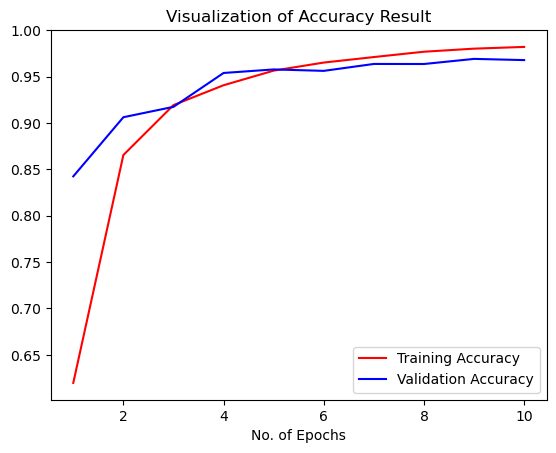

In [35]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

## Some other metrics for model evaluation

In [52]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [37]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [39]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

17572/17572 [==============================] - 150s 9ms/step


(array([[9.99999881e-01, 2.61928457e-09, 6.08408046e-11, ...,
         7.00452286e-15, 2.05660743e-15, 3.47464380e-13],
        [1.00000000e+00, 3.50562412e-10, 2.48494714e-12, ...,
         4.03220675e-15, 4.19939268e-16, 1.58543968e-14],
        [1.00000000e+00, 2.30235622e-11, 5.00333802e-12, ...,
         4.13685432e-18, 1.70032430e-15, 1.17283841e-13],
        ...,
        [1.14982406e-07, 8.04267375e-10, 1.16738045e-06, ...,
         1.63082436e-09, 2.92354474e-10, 9.99710381e-01],
        [7.44154871e-09, 5.40564642e-12, 4.11132532e-08, ...,
         1.78063758e-10, 3.67924961e-12, 9.99992013e-01],
        [1.20246773e-11, 5.99611777e-13, 6.98226199e-11, ...,
         4.91979341e-13, 4.60285109e-12, 9.99996185e-01]], dtype=float32),
 (17572, 38))

In [41]:
predicted_categories = tf.argmax(y_pred, axis=1)
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [42]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [43]:
Y_true = tf.argmax(true_categories, axis=1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [44]:
from sklearn.metrics import confusion_matrix,classification_report

In [46]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.99      0.93      0.96       504
                                 Apple___Black_rot       0.99      0.99      0.99       497
                          Apple___Cedar_apple_rust       0.99      0.97      0.98       440
                                   Apple___healthy       0.96      0.98      0.97       502
                               Blueberry___healthy       0.98      0.96      0.97       454
          Cherry_(including_sour)___Powdery_mildew       1.00      0.99      0.99       421
                 Cherry_(including_sour)___healthy       0.99      0.98      0.98       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.97      0.88      0.92       410
                       Corn_(maize)___Common_rust_       0.99      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.91      0.98      0.

In [48]:
cm = confusion_matrix(Y_true,predicted_categories)
cm.shape

(38, 38)

## Confusion Matrix Visualization

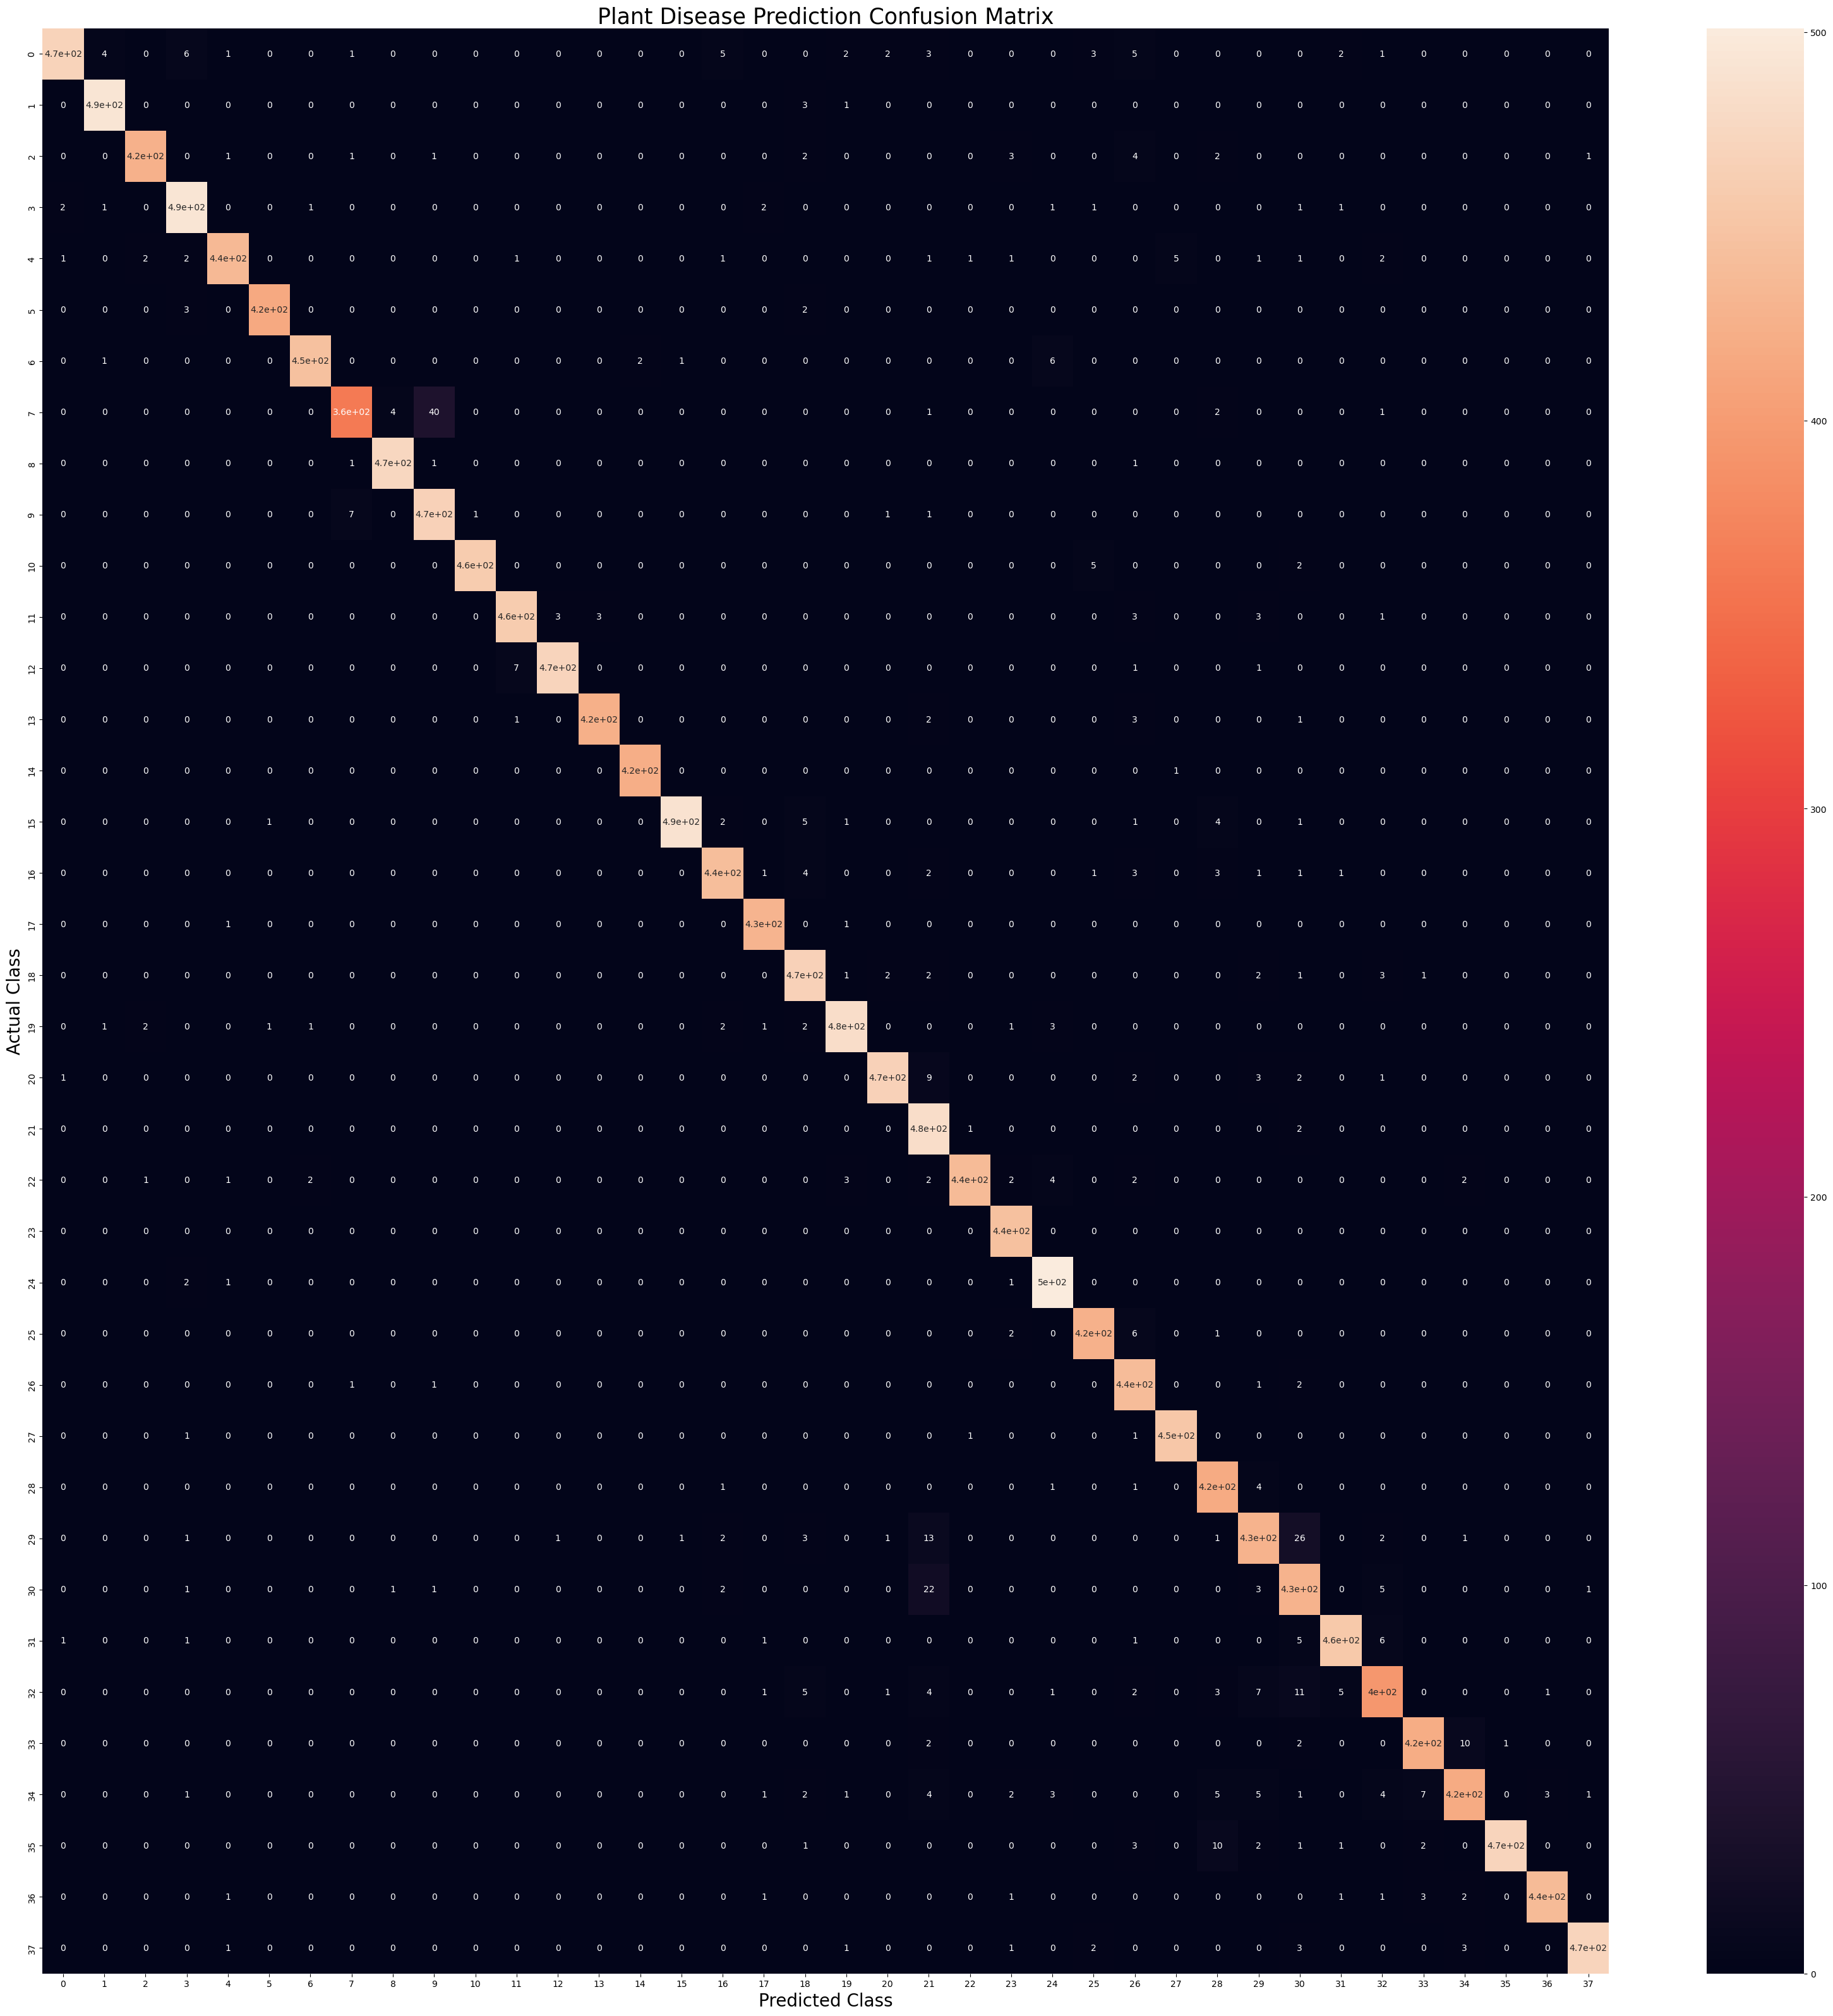

In [50]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()